## Test Technique Data Science -Big Data 2024

In [42]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [5]:
#importtation des bibliotheque
import pandas as  pd ,re, scipy as sp, scipy.stats
import numpy as np  
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import seaborn as sns

In [5]:
def clean():
    
    df["mask_price"] == df["Quantity"] > 0
    df["mask_price"]>0
    df.dropna(inplace=True)
    df.rename(columns={'Quantity': 'mask_price'}, inplace=True)
    #  ici nous gerons les valeur manquantes et incorect Valeur manquante  &  valeur Incorrect 
    df.drop(df[(df.Quantity>0) & (df.InvoiceNo.str.contains('C') == True)].index, inplace = True)
    df.drop(df[(df.Quantity<0) & (df.InvoiceNo.str.contains('C') == False)].index, inplace = True)
    df.drop(df[df.Description.str.contains('?',regex=False) == True].index, inplace = True)
    df.drop(df[df.UnitPrice == 0].index, inplace = True)

    for index,value in df.StockCode[df.Description.isna()==True].items():
        if pd.notna(Data.Description[df.StockCode == value]).sum() != 0:
            df.Description[index] = df.Description[df.StockCode == value].mode()[0]
        else:
            
            df.drop(index = index, inplace = True)
            
    df['Description'] = df['Description'].astype(str)



    
    return df

#### 1 - preparation des donnees et exploration des donnees

In [6]:
#ouverture du fichier excel
df =pd.read_excel("Online_Retail.xlsx")

In [3]:
#affichage des premiere ligne de notre dataframe
df.head()

NameError: name 'df' is not defined

In [7]:
#on explore notre dataframe pour voir combien de colone et le ligne elle comporte
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- Apres exploration notre dataframe comporte 541909 ligne et 8 columns

In [8]:
#verifions les valeur manquantes
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


- Apres verification on se rend comptes quil ya des valeur manquante sur la colone Description et customerID

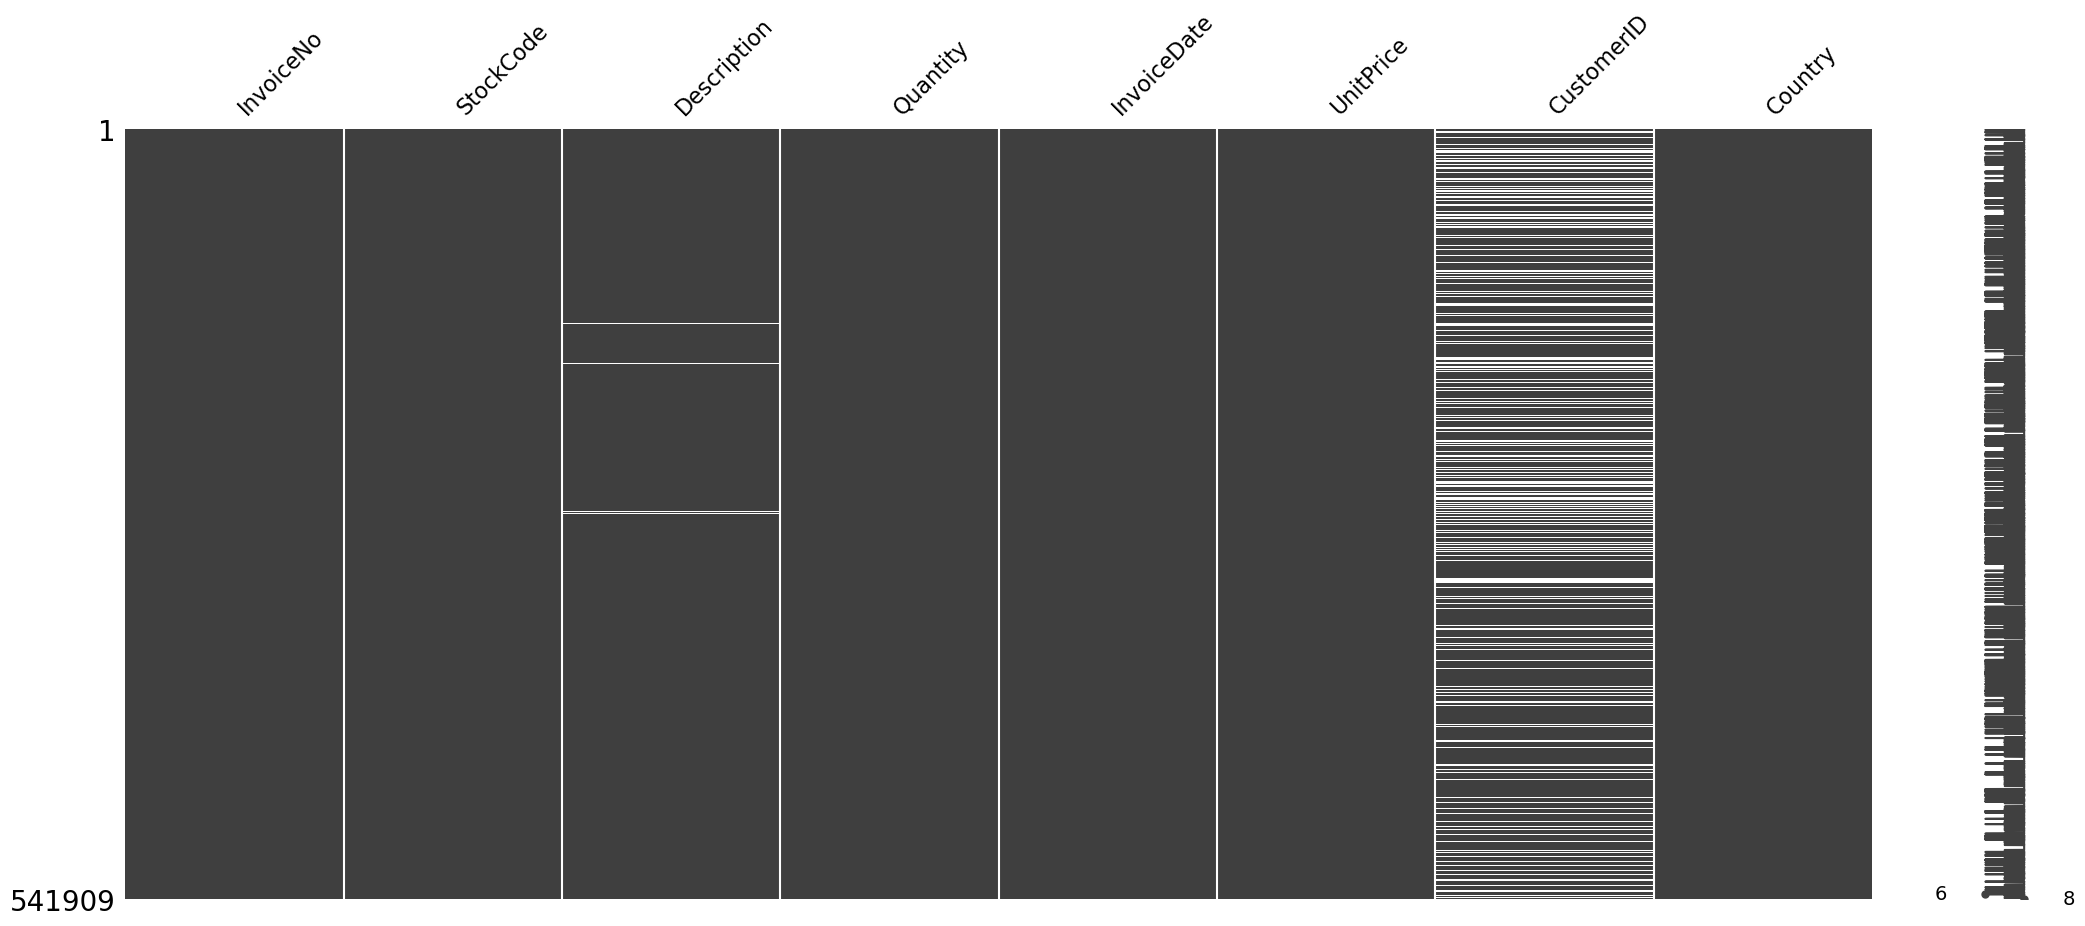

In [11]:
# representons maintenant les valeur manquante sur un graphe missingno
msno.matrix(df)
plt.show()

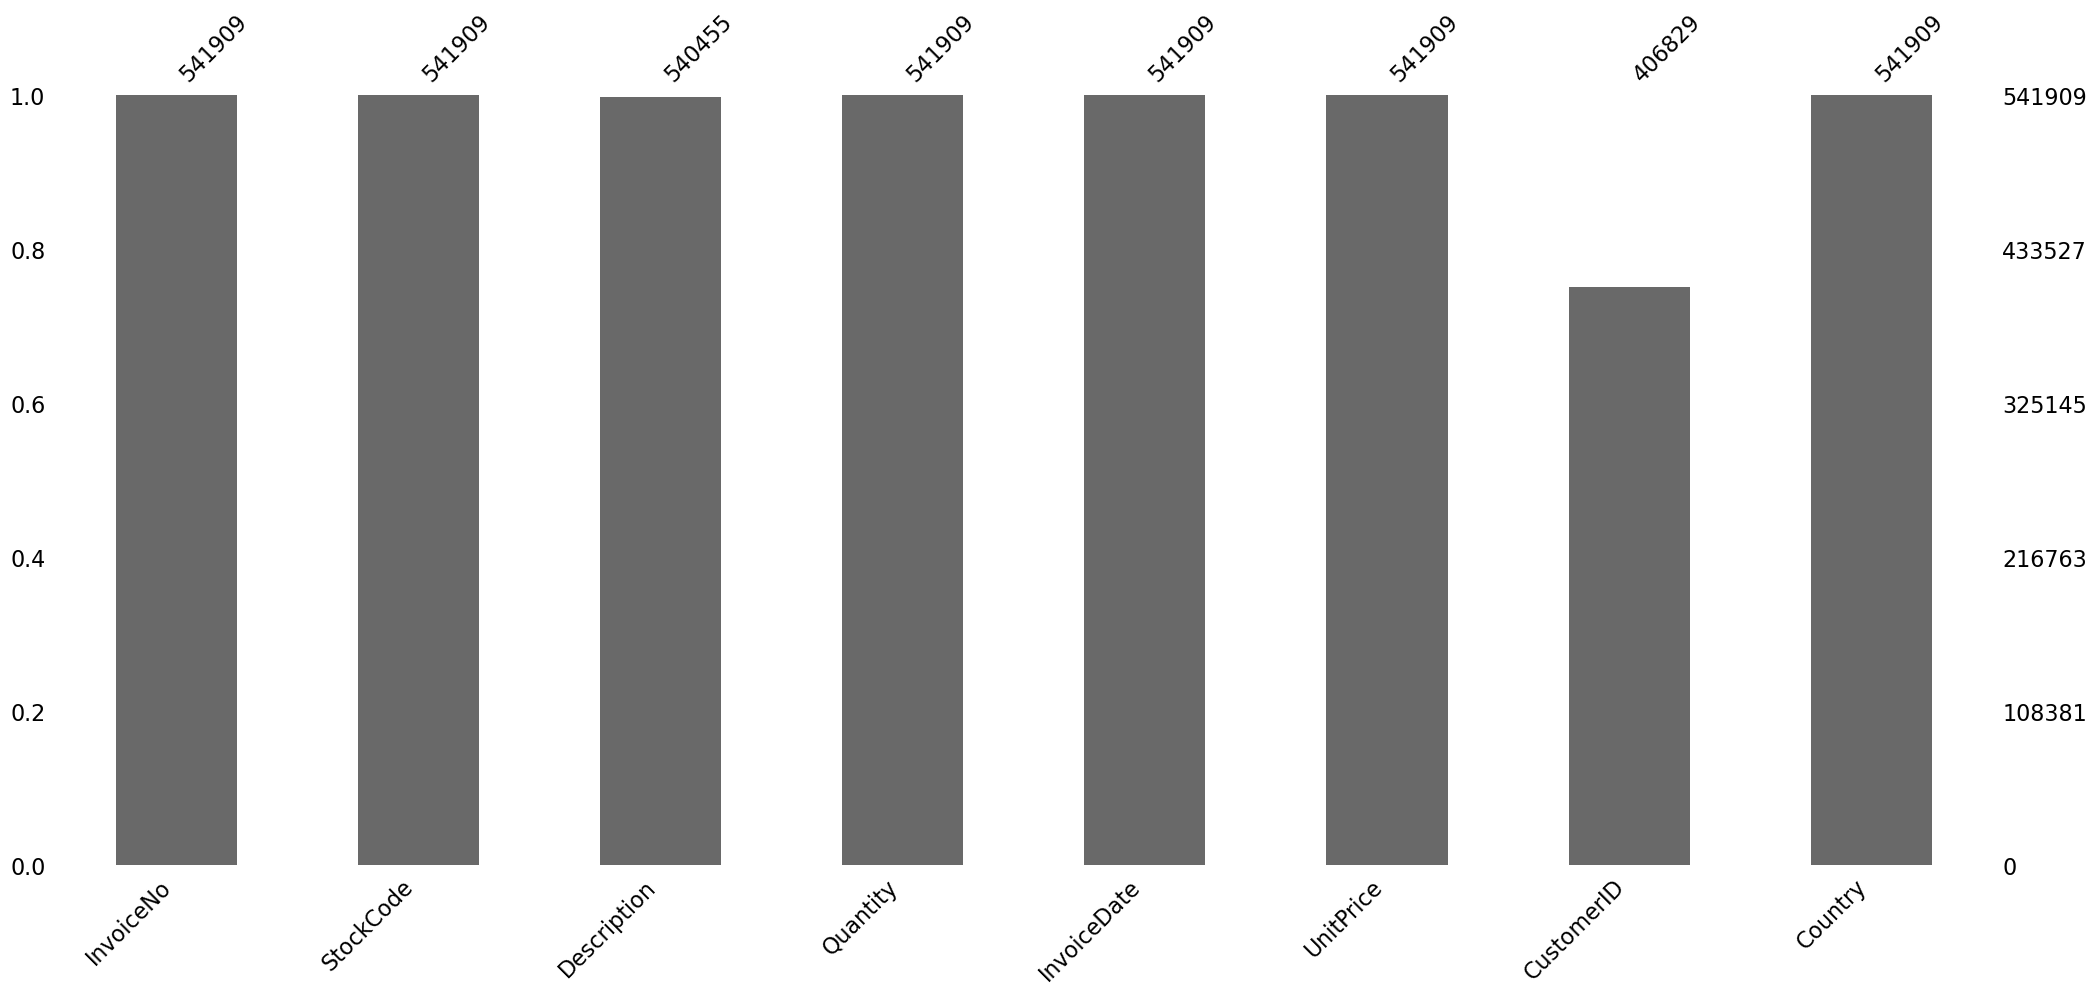

In [12]:
msno.bar(df)
plt.show()

In [13]:
#Ici noue regardons le pourcentage lier au valeur manquante
# Tableau des valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

             Missing Values  Percentage
InvoiceNo                 0    0.000000
StockCode                 0    0.000000
Description            1454    0.268311
Quantity                  0    0.000000
InvoiceDate               0    0.000000
UnitPrice                 0    0.000000
CustomerID           135080   24.926694
Country                   0    0.000000


In [14]:
#description de notre dataframe
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303



Comme cela apparaît clairement dans le résumé de notre ensemble de données, nous avons des valeurs impaires et irrégulières dans les colonnes « UnitPrice » et « Quantité » que nous allons rechercher et supprimer pour éviter qu'elles n'affectent négativement notre analyse. Dans la variable 'StockCode', nous pouvons voir qu'une partie des transactions ne sont pas réellement des produits, mais il s'agit de coûts ou de frais liés à la poste, à la banque ou à d'autres transactions dont nous n'avons pas vraiment besoin dans nos données.

### 2-Analyse exploratoire des donnees(EDA)

In [15]:
# nous avons pris le soins de supprimer les lignes avec les colonne manquantes pour ne pas biaiser notre calcul
# df.dropna(inplace=True)


In [16]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


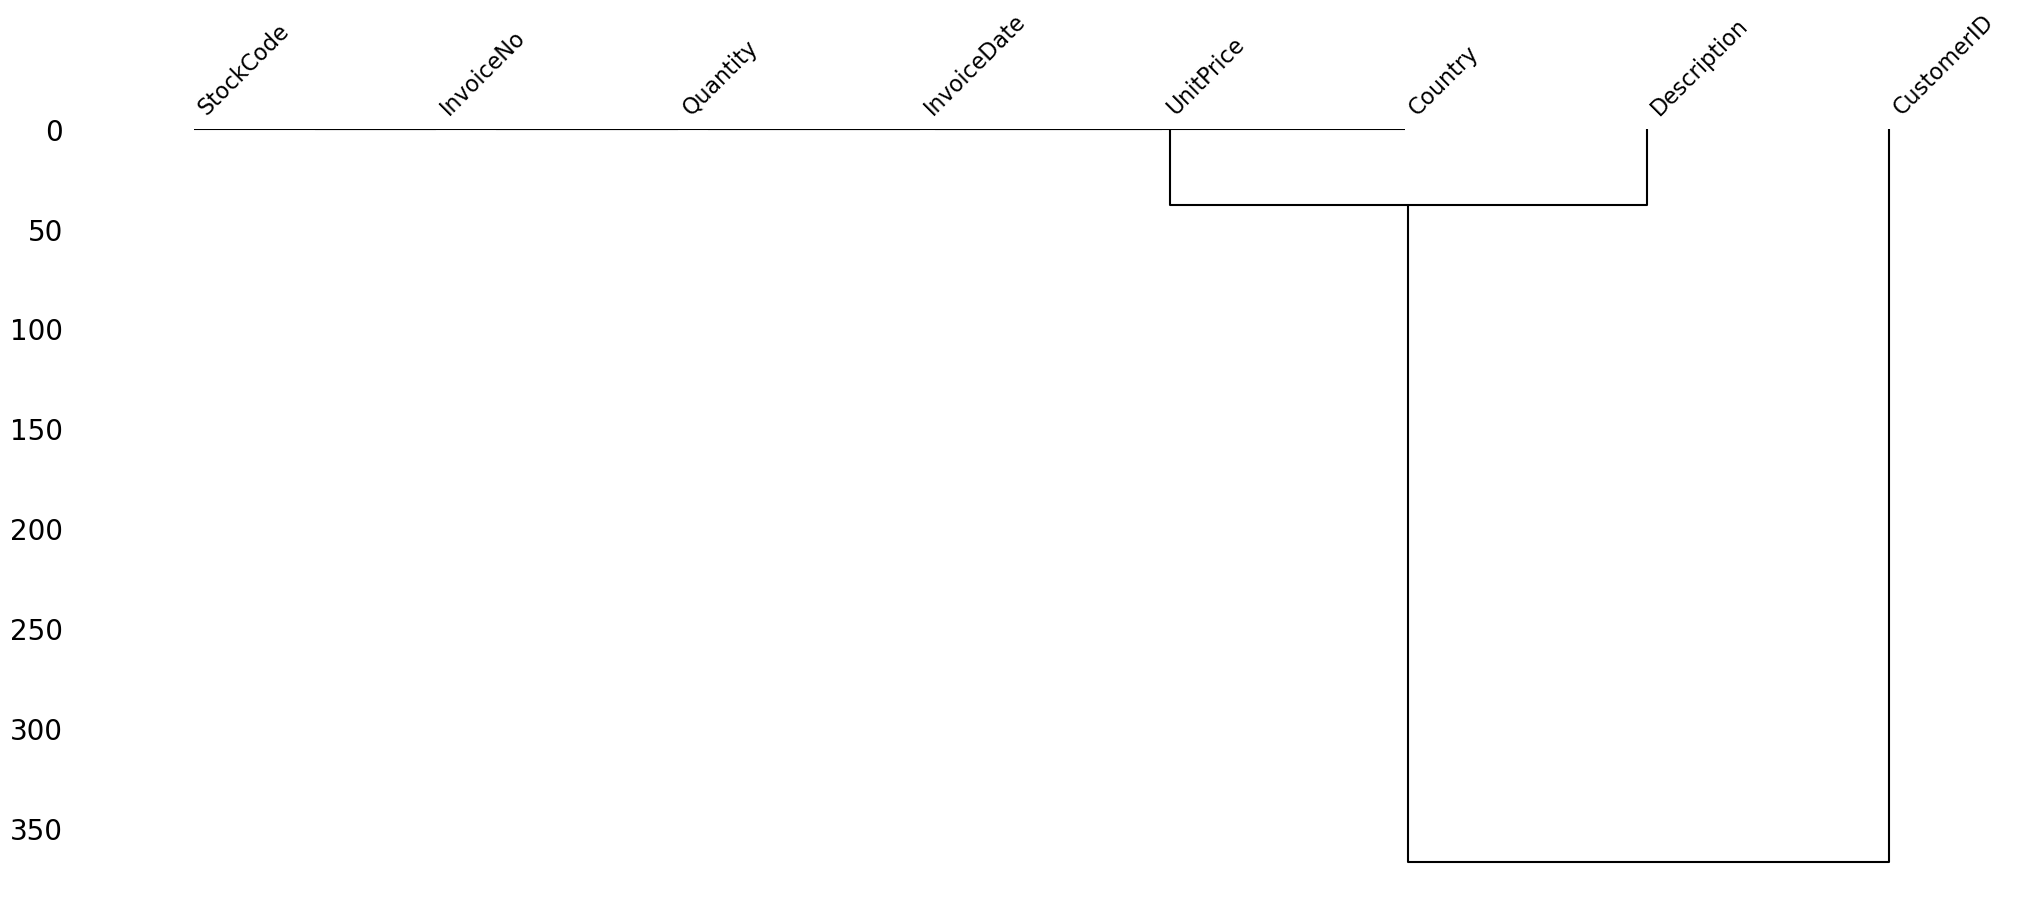

In [18]:
# ici nous voulons voir la corelation entre nos colonne nous utiliserons un dendograme
msno.dendrogram(df)
plt.show()


##### On se rend compte ici que toute les valeur de notre data sont independente

In [19]:
def clean():
    
    mask_price = df["Quantity"] < 0

    
    return df
    

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
#  ici nous gerons les valeur manquantes et incorect Valeur manquante  &  valeur Incorrect 
df.drop(df[(df.Quantity>0) & (df.InvoiceNo.str.contains('C') == True)].index, inplace = True)
df.drop(df[(df.Quantity<0) & (df.InvoiceNo.str.contains('C') == False)].index, inplace = True)
df.drop(df[df.Description.str.contains('?',regex=False) == True].index, inplace = True)
df.drop(df[df.UnitPrice == 0].index, inplace = True)

for index,value in df.StockCode[df.Description.isna()==True].items():
    if pd.notna(Data.Description[df.StockCode == value]).sum() != 0:
        df.Description[index] = df.Description[df.StockCode == value].mode()[0]
    else:
        df.drop(index = index, inplace = True)
        
df['Description'] = df['Description'].astype(str)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539394 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539394 non-null  object        
 1   StockCode    539394 non-null  object        
 2   Description  539394 non-null  object        
 3   Quantity     539394 non-null  int64         
 4   InvoiceDate  539394 non-null  datetime64[ns]
 5   UnitPrice    539394 non-null  float64       
 6   CustomerID   406789 non-null  float64       
 7   Country      539394 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.0+ MB


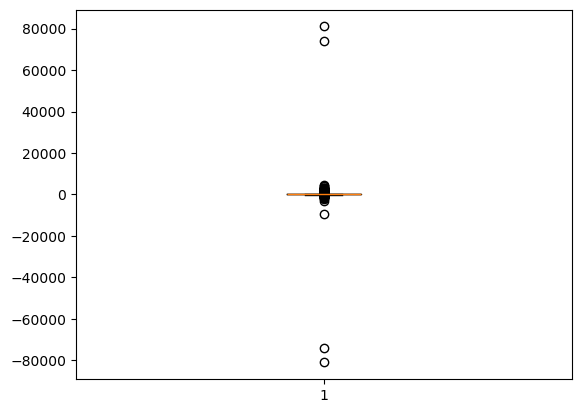

In [23]:

plt.boxplot(df["Quantity"])
plt.show()

##### Apres exploration des donnes on se rend comptes que nous avons des quantite negative ce qui n'est pas normal

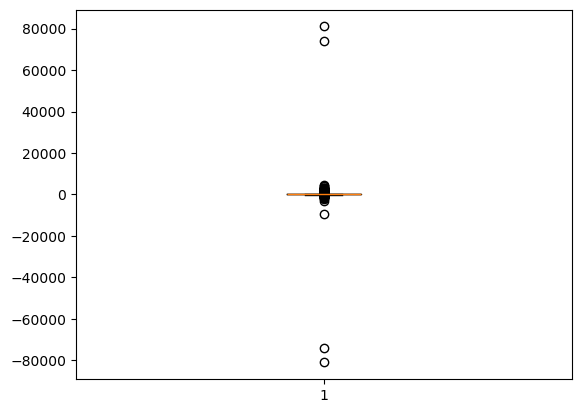

In [24]:
plt.boxplot(df["Quantity"])
plt.show()

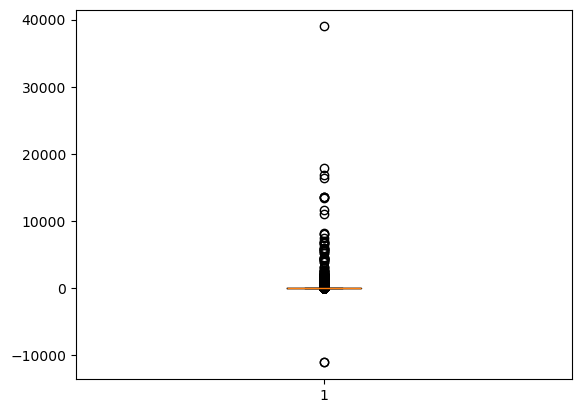

In [25]:
plt.boxplot(df["UnitPrice"])
plt.show()

In [26]:
# Suppression des valeurs négatives dans la colonne 'Quantité'
df = df[df['Quantity'] >= 0]
df = df[df['UnitPrice'] >= 0]




In [10]:
# Sauvegarde des données nettoyées
df.to_csv("data_nettoyee.csv")

In [11]:
df1= pd.read_csv("data_nettoyee.csv")
df1

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


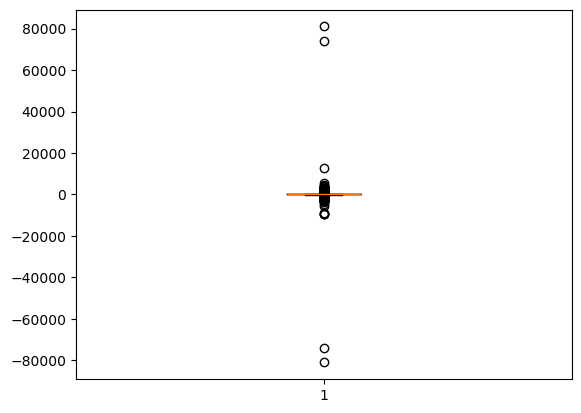

In [12]:
plt.boxplot(df1["Quantity"])
plt.show()

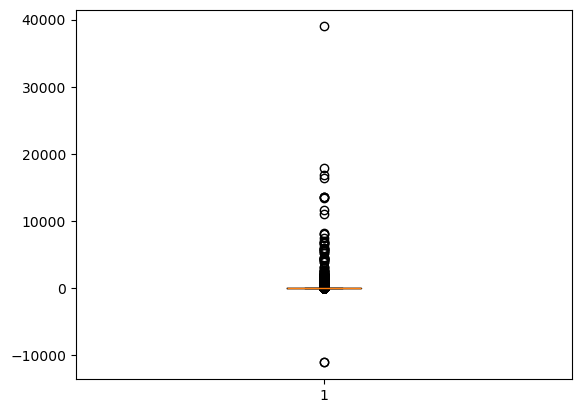

In [13]:
plt.boxplot(df1["UnitPrice"])
plt.show()

##### Apres supression des valeurs megatives  nous pouvons travailler

In [2]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.regplot(data=df1, x="Quantity",y="UnitPrice")

UnitPrice

NameError: name 'plt' is not defined

In [ ]:
#top 20 produits par quantité et prix finalsns.set_style('darkgrid')
Top20Quan = df1.groupby('Description')['Quantity'].agg('sum').sort_values(ascending=False)[0:20]
Top20Price = df1.groupby('Description')['UnitPrice'].agg('sum').sort_values(ascending=False)[0:20]
#creation du subplot
fig,axs = plt.subplots(nrows=2, ncols=1, figsize = (12,12))
plt.subplots_adjust(hspace = 0.3)
fig.suptitle('Produits les plus vendus par quantité et valeur', fontsize=15, x = 0.4, y = 0.98)
sns.barplot(x=Top20Quan.values, y=Top20Quan.index, ax= axs[0]).set(xlabel='Montant total des ventes')
axs[0].set_title('Par montant', size=12, fontweight = 'bold')
sns.barplot(x=Top20Price.values, y=Top20Price.index, ax= axs[1]).set(xlabel='Valeur totale des ventes')
axs[1].set_title('Par Valuer', size=12, fontweight = 'bold')
plt.show()


##### La prochaine statistique qui nous intéresse est celle qui indique quels produits ont été le plus souvent retournés par nos clients, ainsi que quels clients et de quels pays ont reçu le plus d'articles retournés dans leurs transactions.

In [ ]:
# ##tracer la quantité par rapport au prix unitaire
# Corr = sns.jointplot(x="Quantity", y="UnitPrice", data = df1[df1.UnitPrice>0], height = 7)
# Corr.fig.suptitle("UnitPrice and Quantity Comparison", fontsize = 15, y = 1.1)
# plt.show()


In [55]:
#creating the pie chart
# df1.groupby('Day of week')['UnitPrice'].sum().plot(kind = 'pie', autopct = '%.2f%%', figsize=(7,7)).set(ylabel='')
# plt.title('Pourcentages de valeur des ventes par jour de la semaine', fontsize = 15)
# plt.show()

In [46]:
# #filtering customers by the total finalprice
# Top10Customers = Data_Cleaned.groupby(['CustomerID','Country'])['FinalPrice'].sum().sort_values(ascending=False)[0:10]
# #creating the barplot
# plt.figure(figsize=(8,5))
# sns.barplot(x=Top10Customers.values, y=Top10Customers.index).set(xlabel='Total Value',ylabel='CustomerID')
# plt.suptitle('Top10 Customers and Country of Origin by Sales Value', fontsize = 15)
# plt.show()

#### 3-Modelisations

In [ ]:
#grouping the data by customers and preparing for segmentation
Data = df1.copy()
Data['Country'] = Data['Country'].map(lambda x: 'UK' if x=='UNITED KINGDOM' else 'non-UK')
CustomerData = Data.groupby(['CustomerID','Country'], sort=False).agg({'Quantity':'mean','UnitPrice':'mean','InvoiceNo':'nunique','Description':'nunique'})
CustomerData.reset_index(inplace=True)
CustomerData.columns = ['CustomerID', 'UK?', 'Average Quantity', 'Average Price', 'Repeats', 'Product Variety']
CustomerData.head()

##### Avant de commencer le processus, ce serait une bonne idée de mettre à l'échelle les caractéristiques numériques afin d'éviter les effets négatifs de l'ampleur des caractéristiques et également d'accélérer le processus.

Dans les données client, nous avons une variable catégorielle qui est le pays du client. C'est la raison pour laquelle nous avons choisi un algorithme appelé k-prototypes qui peut également prendre en compte les variables catégorielles. Dans ce type de méthodes, nous devons donner à l’algorithme le nombre exact de clusters. Comme nous ne sommes pas sûrs du nombre, nous vérifierons le coût de clustering et le score silhouette pour déterminer le nombre optimal de clusters. La valeur moyenne de la silhouette détermine le degré de similitude des points de données avec leur propre cluster par rapport aux autres clusters (en utilisant la distance euclidienne par défaut).

In [44]:
#mise à l'échelle des caractéristiques numériques pour le clustering
Scaler = StandardScaler()
CustomerData.iloc[:,2:] = Scaler.fit_transform(CustomerData.iloc[:,2:])
syms = CustomerData.iloc[:,0].values.astype(str)
X = CustomerData.iloc[:,1:].values.astype(object)
#recherchons le meilleur  k
for n in range(2,8):
    kproto = KPrototypes(n_clusters = n, init = 'Cao')
    clusters = kproto.fit_predict(X, categorical = [0])
    silhouette = silhouette_score(X[:,1:],clusters)
    print('number of clusters:', n)
    print('  cost: ',kproto.cost_)
    print('  average silhouette score: ',silhouette)

number of clusters: 2
  cost:  14191.388923976656
  average silhouette score:  0.7146828442268819
number of clusters: 3
  cost:  10658.142771316363
  average silhouette score:  0.7198735488103027
number of clusters: 4
  cost:  8200.626640970702
  average silhouette score:  0.7272091429527845
number of clusters: 5
  cost:  6040.944769275238
  average silhouette score:  0.6628755637883378
number of clusters: 6
  cost:  4928.997231739474
  average silhouette score:  0.5675109564361764
number of clusters: 7
  cost:  3402.9859865513986
  average silhouette score:  0.5782226695959787


In [49]:
#clustering avec kprototypes avec k = 3
kproto = KPrototypes(n_clusters = 3, init = 'Cao')
clusters = kproto.fit_predict(X, categorical = [0])
print('Cluster Centers:\n', kproto.cluster_centroids_)

Cluster Centers:
 [['-0.018996567590658504' '0.0031661145528912743' '-0.16915852077175447'
  '-0.20195177413296922' 'non-UK']
 ['-0.023413802483183123' '-0.032669829406237645' '1.7731474724403675'
  '2.1182894810786586' 'non-UK']
 ['42.01941593123488' '-0.09114294239291097' '-0.36015968392816067'
  '-0.6941509147184244' 'non-UK']]


#### Since we scaled the data for clustering, we need to scale them back to their actual values and then we put all the original data and their cluster labels in a dataframe.

In [50]:
#scaling back to original values and retrieving all attributes
Clustered = pd.DataFrame(data=Scaler.inverse_transform(CustomerData.iloc[:,2:]),columns=['Average Quantity', 'Average Price', 'Repeats', 'Product Variety'])
Clustered['UK?'] = X[:,0]
Clustered['CustomerID'] = syms
Clustered['Cluster'] = clusters
print(Clustered.groupby(['Cluster','UK?']).count()['Repeats'],'\n\n\n')
print(Clustered.groupby(['Cluster','UK?']).mean())

Cluster  UK?   
0        non-UK    3958
1        non-UK     378
2        non-UK       2
Name: Repeats, dtype: int64 





TypeError: agg function failed [how->mean,dtype->object]

##### Nous pouvons maintenant voir comment nos clusters sont répartis le long de chaque variable dans des nuages ​​de points par paires. Dans le premier groupe, il y a des clients (principalement britanniques) qui ont acheté des produits très spécifiques à bas prix en gros volumes, mais pas très souvent. Les clients ponctuels sont plus susceptibles de faire partie de ce segment. Le deuxième groupe représente nos clients réguliers qui viennent assez souvent acheter divers produits en petites quantités. Le troisième cluster est constitué de clients qui ont acheté différents produits à un prix plus élevé et qui effectuent occasionnellement un achat. La majorité de nos clients (venant de pays britanniques et non britanniques) font partie de ce cluster.

/home/dav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

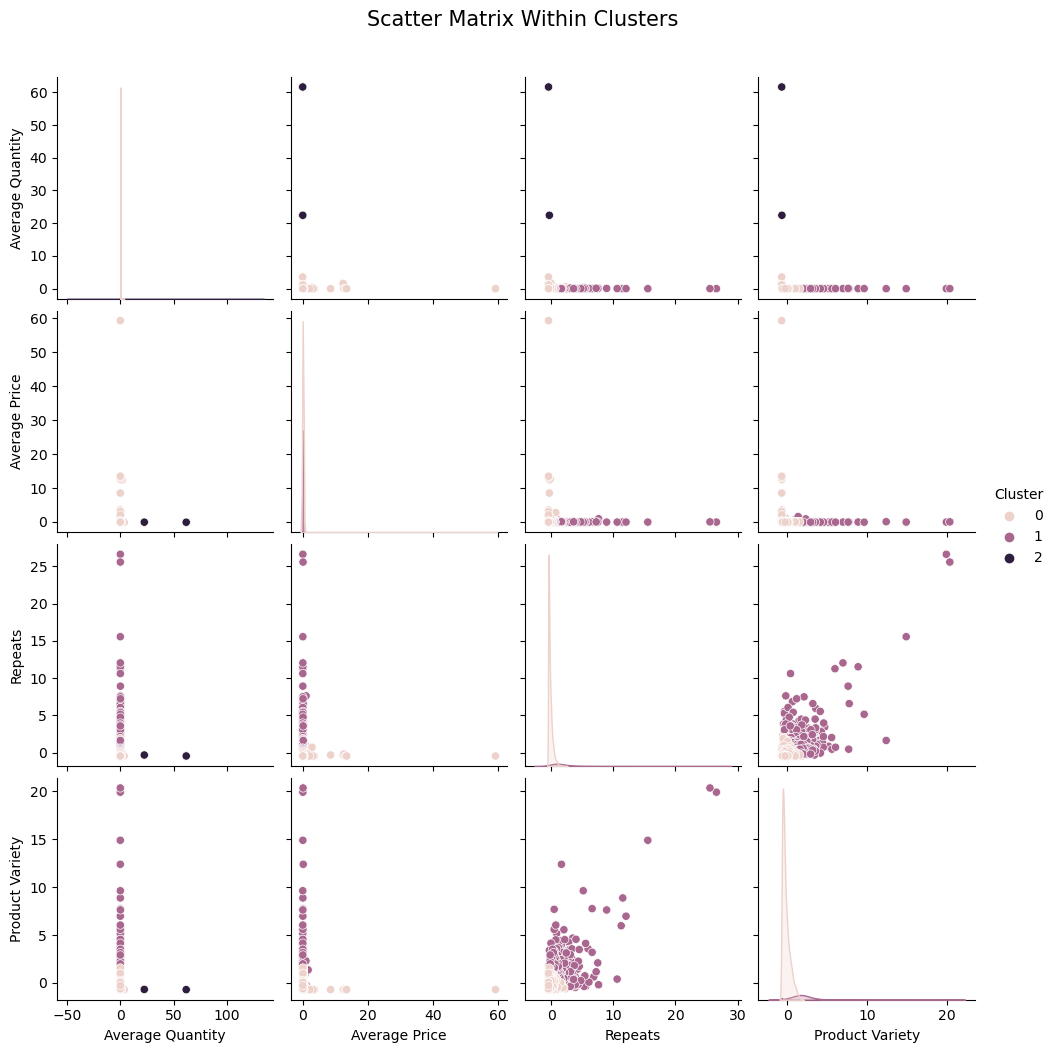

In [51]:
#comparisons plots
sns.pairplot(Clustered.drop(columns=['UK?','CustomerID']), hue='Cluster')
plt.suptitle('Scatter Matrix Within Clusters', fontsize = 15, y = 1.05)
plt.show()

#### Dans la dernière partie, nous visualiserons tous les points de données et le cluster auquel ils appartiennent dans un seul graphique afin que nous puissions voir comment ils sont situés dans l'espace de données et à quel point ils sont séparés et avoir une bonne vision des clusters (segments de clients ). Chaque axe montre la caractéristique correspondante, les couleurs montrent le cluster auquel appartient le point de données, la taille de chaque point indique la régularité d'achat (répétitions) et les marqueurs représentent le pays du client (cercles pour le Royaume-Uni et carrés pour les clients non britanniques).

/home/dav/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


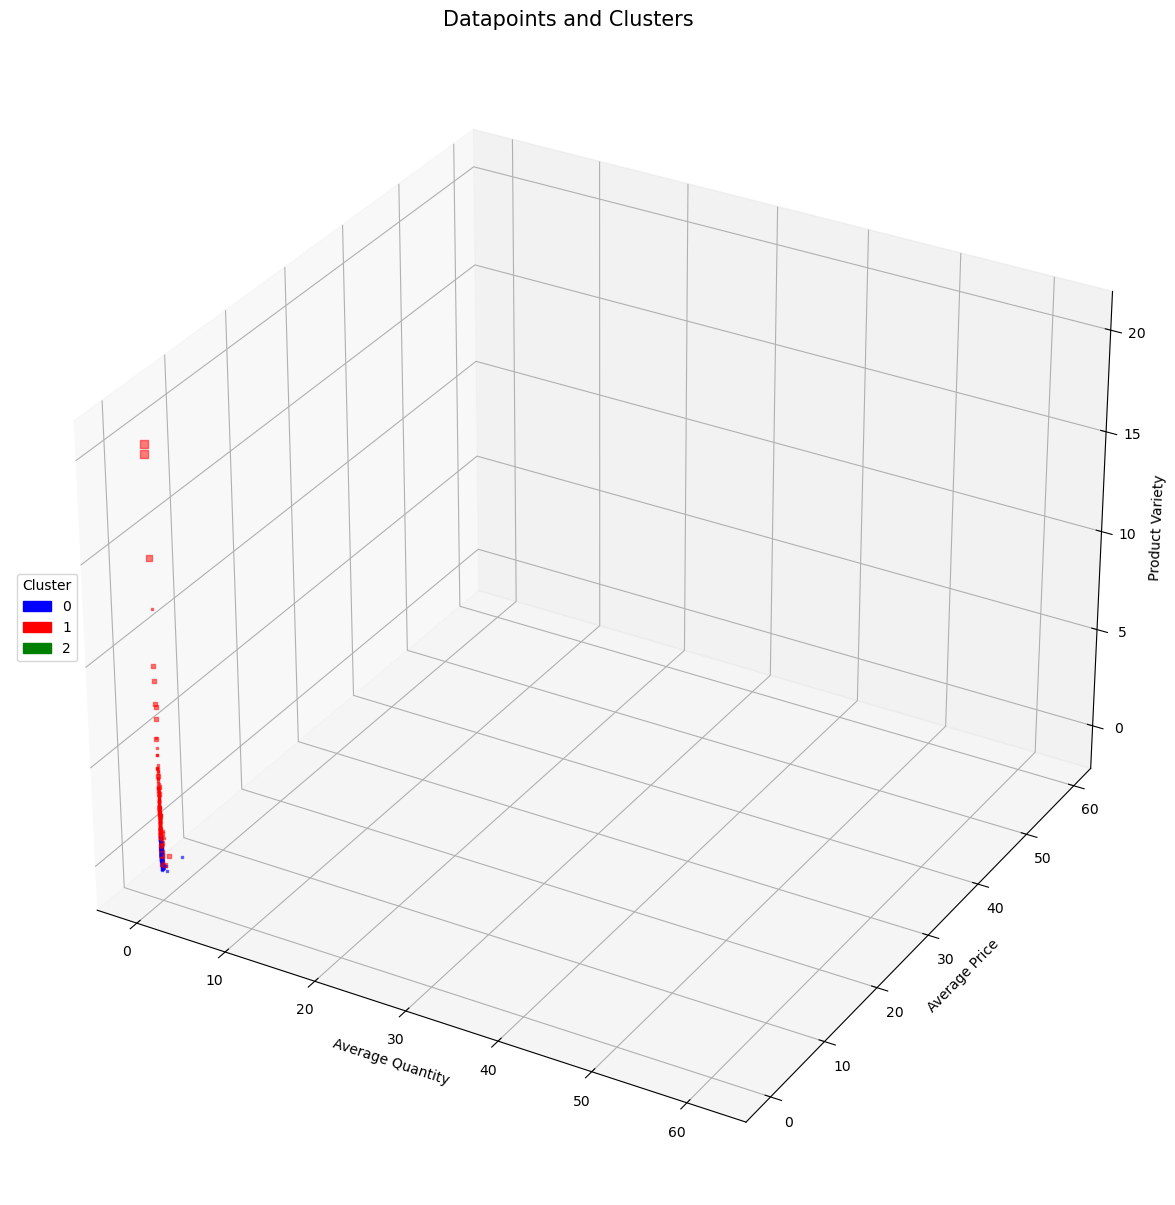

In [52]:
##tracer tous les points de données par rapport à leur cluster
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
#datapoints
xd = list(Clustered['Average Quantity'])
yd = list(Clustered['Average Price'])
zd = list(Clustered['Product Variety'])
data_points = [(x,y,z) for x,y,z in zip(xd,yd,zd)]
#specifying point sizes for the number of repeats
sizes = list(Clustered['Repeats'])
#colors for clusters
colorlist = ['blue','red','green']
colors = list(map(lambda x: colorlist[x], Clustered['Cluster']))
#markers for country names
markers = ['o' if con == 'UK' else ',' for con in list(Clustered['UK?'])]
#creating the scatterplot
for data, size, color, mark in zip(data_points, sizes, colors, markers):
    x,y,z = data
    ax.scatter(x,y,z, alpha=0.5, c=color, s=size, marker=mark)
ax.set(xlabel='Average Quantity', ylabel='Average Price', zlabel='Product Variety')
#plot legend for cluster colors
legend_items = {'0':'blue', '1':'red', '2':'green'}
itemlist = []
for itemkey in legend_items:
    patch = mpatches.Patch(color=legend_items[itemkey], label=itemkey)
    itemlist.append(patch)
plt.legend(handles=itemlist, title='Cluster', fancybox=True, loc=6)
plt.suptitle('Datapoints and Clusters', fontsize = 15, y = 0.90)
plt.show()

In [21]:
#chargement des donne
target = "Quantity"
X =df1.drop(columns=[target])
y = df1[target]

In [22]:
#Entrainement
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [23]:
#Calculez le score de précision de base pour votre modèle.
acc_baseline = y_train.value_counts(normalize=True)
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: Quantity
 1      0.27
 2      0.15
 12     0.11
 6      0.08
 4      0.07
        ... 
-960    0.00
-355    0.00
-900    0.00
-620    0.00
-480    0.00
Name: proportion, Length: 662, dtype: float64


In [72]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 166.6 kB/s eta 0:00:00kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:

from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression()
    
    
    )
# Fit model to training data
model_lr.fit(X_train,y_train)
# Fit model to training data


In [ ]:
#modele de prediction
y_pred = model.predict(X_test)
y_pred